In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from matplotlib.pyplot import rc
rc('mathtext', **{'fontset':'cm'})
import matplotlib
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

/tmp/ipykernel_112383/404509470.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(fig_inputs['chiticks'])


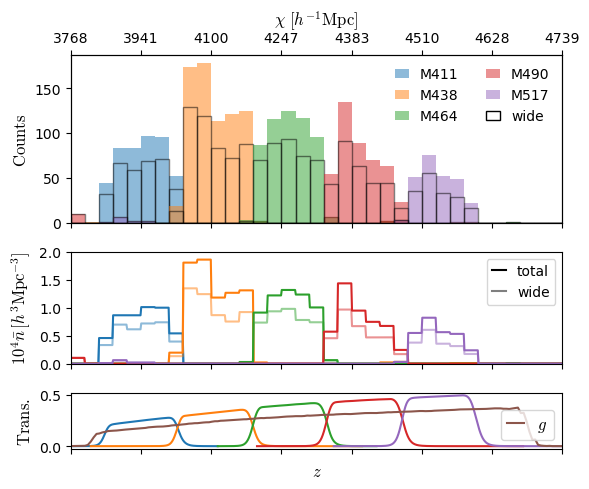

In [9]:
# now make a plot with json file

import json
with open('plot_inputs/Fig1.json', 'r') as f:
    fig_inputs = json.load(f)

fig, axs = plt.subplots(3,1,figsize=(6,5),height_ratios=[3,2,1])
ax=axs[0]
for i, band in enumerate(fig_inputs['bands']):
    ax.hist(fig_inputs['panel1']['zbins'][:-1],bins=fig_inputs['panel1']['zbins'],weights=fig_inputs['panel1']['dNdz_%s'%band],alpha=.5,label=band,color='C%d'%i)
    ax.hist(fig_inputs['panel1']['zbins'][:-1],bins=fig_inputs['panel1']['zbins'],weights=fig_inputs['panel1']['dNdz_wide_%s'%band],alpha=.5,fill=False,edgecolor='k')
ax.hist([],fill=False,edgecolor='k',label='wide')
ax.set_ylabel(r'$\text{Counts}$',fontsize=12)
ax.set_xlim(2.2,3.6)
ax.set_xticklabels([])
ax.legend(ncol=2,frameon=False,handlelength=1)

ax = axs[1]
z_plot = np.array(fig_inputs['panel2']['z_plot'])
for i, band in enumerate(fig_inputs['bands']):
    ax.plot(z_plot,fig_inputs['panel2']['nbar_%s'%band],color='C%d'%i)
    ax.plot(z_plot,fig_inputs['panel2']['nbar_wide_%s'%band],alpha=.5,color='C%d'%i)
ax.set_xlim(2.2,3.6)
ax.set_ylim(0,2)
ax.set_ylabel(r'$10^4 \bar{n}\,[h^{3} \text{Mpc}^{-3}]$',fontsize=12)
ax.set_xticklabels([])
ax.plot([],[],'k',label='total')
ax.plot([],[],'k',alpha=.5,label='wide')
ax.legend(loc='upper right',handlelength=1)

ax=axs[2]
filts = ['M411','M438','M464','M490','M517','g',]
ax = plt.gca()
for i,filt in enumerate(filts):
    ax.plot(fig_inputs['panel3'][filt]['WAVE'],fig_inputs['panel3'][filt]['TRANS'],color='C%d'%i)
ax.set_xlim(2.2,3.6)
# ax.set_ylim(0,2)
ax.set_ylabel(r'$10^4 \bar{n}\,[h^{3} \text{Mpc}^{-3}]$',fontsize=12)
ax.set_xticklabels([])
ax.plot([],[],c='C5',label='$g$')
ax.legend(loc='upper right',handlelength=1)
ax.set_xlabel(r"$z$",fontsize=12)
ax.set_ylabel(r"$\text{Trans.}$",fontsize=12)
ax.legend(fontsize=12,handlelength=1)
ax=axs[0]
ax2 = ax.twiny()
ax2.set_xlim(2.2,3.6)
ax2.set_xticklabels(fig_inputs['chiticks'])
ax2.set_xlabel(r"$\chi\,\, [h^{-1} {\rm Mpc}]$",fontsize=12)
fig.tight_layout()
# fig.savefig('plots/dNdz_bands_filters_fromjson.pdf')
fig.show()


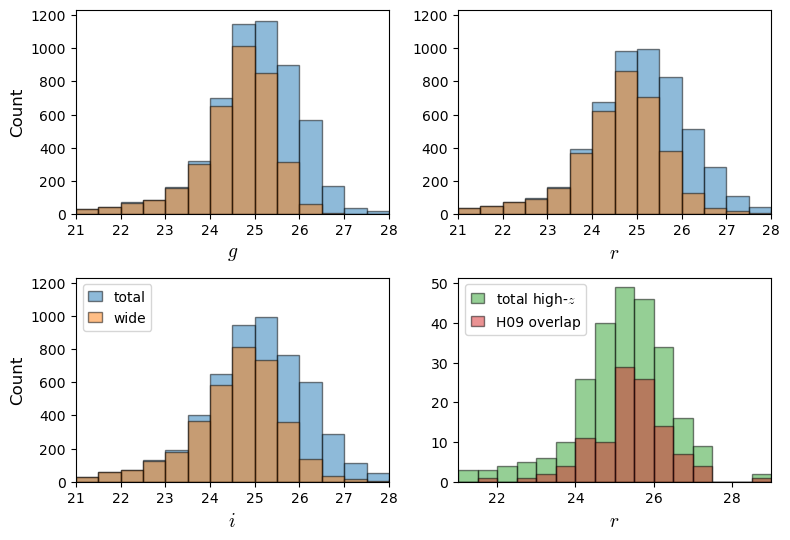

In [10]:
# now make plot from json file

import json
import os
with open('plot_inputs/Fig2.json', 'r') as f:
    fig_inputs = json.load(f)

fig, axs = plt.subplots(2,2,figsize=(8,5.5))
# ax.hist(clustering_total['MAG_R'],bins=bins,alpha=.5)
ax = axs.flatten()[0]
ax.hist(fig_inputs['panel1']['total']['edges'][:-1],bins=fig_inputs['panel1']['total']['edges'],weights=fig_inputs['panel1']['total']['hist'],alpha=.5,color='C0',edgecolor='k')
ax.hist(fig_inputs['panel1']['total']['edges'][:-1],bins=fig_inputs['panel1']['wide']['edges'],weights=fig_inputs['panel1']['wide']['hist'],alpha=.5,color='C1',edgecolor='k')
ax.set_xlim(21,28)
ax.set_xlabel(r'$g$',fontsize=14)
ax.set_ylabel(r'Count',fontsize=12)
ax.set_ylim(0,1230) 

ax = axs.flatten()[1]
ax.hist(fig_inputs['panel2']['total']['edges'][:-1],bins=fig_inputs['panel2']['total']['edges'],weights=fig_inputs['panel2']['total']['hist'],alpha=.5,color='C0',edgecolor='k')
ax.hist(fig_inputs['panel2']['wide']['edges'][:-1],bins=fig_inputs['panel2']['wide']['edges'],weights=fig_inputs['panel2']['wide']['hist'],alpha=.5,color='C1',edgecolor='k')
ax.set_xlim(21,28)
ax.set_xlabel(r'$r$',fontsize=14)
ax.set_ylim(0,1230)

ax = axs.flatten()[2]
ax.hist([],bins=fig_inputs['panel3']['total']['edges'],alpha=.5,color='C0',edgecolor='k',label=r'total')
ax.hist([],bins=fig_inputs['panel3']['wide']['edges'],alpha=.5,color='C1',edgecolor='k',label=r'wide')
ax.hist(fig_inputs['panel3']['total']['edges'][:-1],bins=fig_inputs['panel3']['total']['edges'],weights=fig_inputs['panel3']['total']['hist'],alpha=.5,color='C0',edgecolor='k')
ax.hist(fig_inputs['panel3']['wide']['edges'][:-1],bins=fig_inputs['panel3']['wide']['edges'],weights=fig_inputs['panel3']['wide']['hist'],alpha=.5,color='C1',edgecolor='k')
ax.set_xlabel(r'$i$',fontsize=14)
ax.set_xlim(21,28)
ax.set_ylim(0,1230)
ax.set_ylabel(r'Count',fontsize=12)
ax.legend(loc='upper left',handlelength=1)

ax = axs.flatten()[3]
ax.hist([],bins=fig_inputs['panel4']['high-z']['edges'],alpha=.5,color='C2',edgecolor='k',label='total high-$z$')
ax.hist([],bins=fig_inputs['panel4']['H09-overlap']['edges'],alpha=.5,color='C3',edgecolor='k',label='H09 overlap')
ax.hist(fig_inputs['panel4']['high-z']['edges'][:-1],bins=fig_inputs['panel4']['high-z']['edges'],weights=fig_inputs['panel4']['high-z']['hist'],alpha=.5,color='C2',edgecolor='k')
ax.hist(fig_inputs['panel4']['H09-overlap']['edges'][:-1],bins=fig_inputs['panel4']['H09-overlap']['edges'],weights=fig_inputs['panel4']['H09-overlap']['hist'],alpha=.5,color='C3',edgecolor='k')
ax.set_xlim(21,29)
ax.set_xlabel(r'$r$',fontsize=14)
ax.legend(loc='upper left',handlelength=1)

fig.tight_layout()
# fig.savefig('plots/broadband_summary_from_json.pdf')
fig.show()


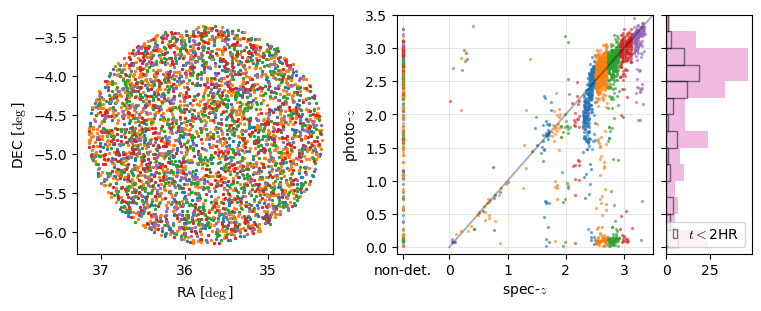

In [11]:
# plot figure from json file

import json
with open('plot_inputs/Fig3.json', 'r') as f:
    fig_inputs = json.load(f)

fig, axs = plt.subplots(1,3,figsize=(7.5,3),width_ratios=[3,3,1],layout='constrained')
ax = axs[0]
for i, band in enumerate(fig_inputs['bands']):
    dtmp2 = fig_inputs['panel1'][band]
    ax.scatter(dtmp2['RA'],dtmp2['DEC'],c='C%d'%i,s=2,alpha=1.)
ax.set_xlabel(r'RA [$\deg$]')
ax.set_ylabel(r'DEC [$\deg$]')
ax.invert_xaxis()
ax = axs[1]
for i, band in enumerate(fig_inputs['bands']):
    dtmp2 = fig_inputs['panel2'][band]
    ax.scatter(dtmp2['specz'],dtmp2['photoz'],c='C%d'%i,s=2,alpha=.5)
ax.plot(np.linspace(0,5),np.linspace(0,5),'k',alpha=.3)
ax.set_xlim(-.9,3.5)
ax.set_ylim(-.1,3.5)
ax.set_xlabel(r'spec-$z$')
ax.set_ylabel(r'photo-$z$')
ax.set_xticks([-.8,0,1,2,3])
ax.set_xticklabels(['non-det.',0,1,2,3])
ax.grid(alpha=.3)
ax = axs[2]
bins = np.linspace(-1,5,num=25)
dtmp2 = fig_inputs['panel3']['g1HR']
ax.hist(dtmp2['edges'][:-1],dtmp2['edges'],weights=dtmp2['hist'],alpha=.5, orientation="horizontal",color='C6',)
dtmp2 = fig_inputs['panel3']['1HR']
ax.hist(dtmp2['edges'][:-1],dtmp2['edges'],weights=dtmp2['hist'],alpha=.5, orientation="horizontal",facecolor='none',edgecolor='k',
       label=r'$t<$2HR');
ax.legend(handlelength=.3,loc='lower right')
ax.set_ylim(-.1,3.5)
ax.set_yticklabels([])
# plt.tight_layout()
# plt.savefig('plots/photoz_specz.pdf')
plt.show()

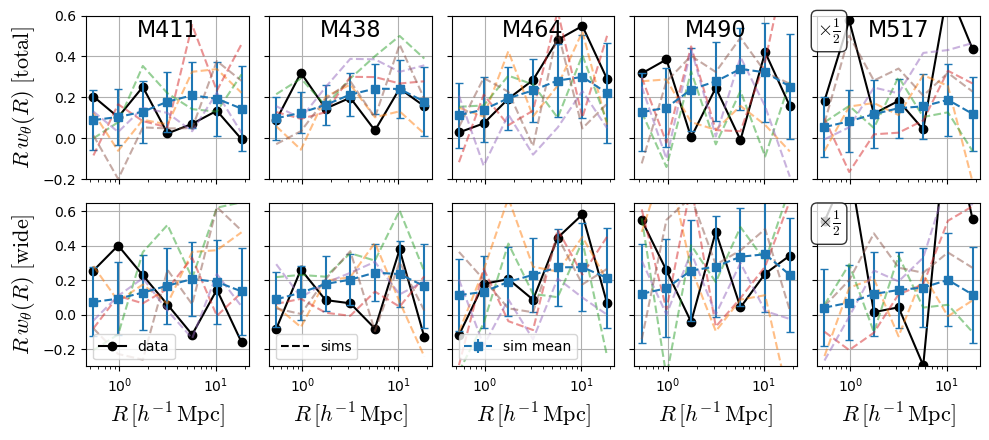

In [16]:
# make figure from json file
import json
fig_inputs = json.load(open('plot_inputs/Fig4.json','r'))

fig, axs = plt.subplots(2,5,figsize=(10,4.5))
props = dict(boxstyle='round', facecolor='w', alpha=0.8)
for i in range(2):
    sample_str = 'total' if i==0 else 'wide'
    for j, band in enumerate(fig_inputs['bands']):
        ax = axs[i,j]
        datrr = np.array(fig_inputs[sample_str]['data'][band]['R'])
        datwt = np.array(fig_inputs[sample_str]['data'][band]['Rwt'])
        if j<4: ax.plot(datrr,datwt,'o-',c='k',)
        else: ax.plot(datrr,0.5*datwt,'o-',c='k',)

        rr = np.array(fig_inputs[sample_str]['bestfit_mean'][band]['R'])
        wt = np.array(fig_inputs[sample_str]['bestfit_mean'][band]['Rwt'])
        dwt = np.array(fig_inputs[sample_str]['bestfit_mean'][band]['Rdwt'])
        if j<4: ax.errorbar(rr,wt,yerr=dwt,c='C0',fmt='s--',capsize=3)
        else: ax.errorbar(rr,.5*wt,yerr=.5*dwt,c='C0',fmt='s--',capsize=3)

        for k in range(5):
            wt = np.array(fig_inputs[sample_str]['bestfit_realizations'][band]['Rwt_%d'%(k+1)])
            if j<4: ax.plot(rr,wt,'C%d--'%(k+1),alpha=.5)
            else: ax.plot(rr,.5*wt,'C%d--'%(k+1),alpha=.5)

        if i==0: 
            ax.set_ylim(-.2,.6)
            ax.set_xscale('log')
            ax.set_xticklabels([])
            ax.set_title(r'%s'%band,fontsize=16,y=.82)
            if j==0: 
                ax.set_ylabel(r'$R \,w_\theta(R)\,\, [{\rm total}]$',fontsize=16)
            else: ax.set_yticklabels([])
            if j==4: ax.text(.45,.5,r'$\times \frac{1}{2}$',fontsize=14,bbox=props)    
            ax.grid()
        else: 
            ax.set_ylim(-.3,.65)
            ax.set_xscale('log')
            ax.set_xlabel(r'$R\,[h^{-1}\,\text{Mpc}]$',fontsize=16)
            if j==0: 
                ax.set_ylabel(r'$R \,w_\theta(R)\,\, [{\rm wide}]$',fontsize=16)
            else: ax.set_yticklabels([])
            if j==4: ax.text(.45,.5,r'$\times \frac{1}{2}$',fontsize=14,bbox=props)    
            ax.grid()

            if j==0:
                ax.plot([],[],'o-',c='k',label='data')
                ax.legend(loc='lower left')
            elif j==1:
                ax.plot([],[],'--',c='k',label='sims')
                ax.legend(loc='lower left')
            elif j==2:
                ax.errorbar([],[],yerr=[],c='C0',fmt='s--',capsize=3,label='sim mean')
                ax.legend(loc='lower left')
fig.tight_layout()
# fig.savefig('plots/data_wR_summary.pdf')
fig.show()



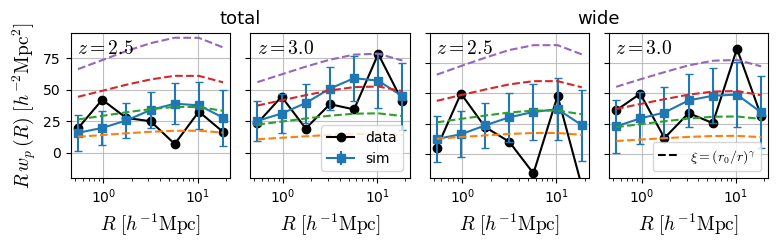

In [19]:
# make plot from json file
import json

fig_inputs = json.load(open('plot_inputs/Fig5.json','r'))
fig, axs = plt.subplots(1,4,figsize=(8,2.5))
for i, (label, bf_dict) in enumerate(fig_inputs.items()): # sample
    for j in range(2): # redshift
        ax = axs[i*2+j]
        RwR = np.array(bf_dict['z%d'%(j+1)]['R'])
        ss = np.array(bf_dict['z%d'%(j+1)]['data'])
        dd = np.array(bf_dict['z%d'%(j+1)]['sim'])
        cov = np.array(bf_dict['z%d'%(j+1)]['cov'])
        ax.plot(RwR,RwR*ss,'ko-')
        ax.errorbar(RwR,RwR*dd,fmt='C0s-',yerr=RwR*np.sqrt(np.diag(cov)),capsize=3)

        chi2 = np.einsum('i,ij,j',ss,np.linalg.inv(cov),ss)

        d_pl = np.array(bf_dict['z%d'%(j+1)]['powerlaw']['2'])
        ax.errorbar(RwR,RwR*d_pl,fmt='C1--',)
        d_pl = np.array(bf_dict['z%d'%(j+1)]['powerlaw']['3'])
        ax.errorbar(RwR,RwR*d_pl,fmt='C2--',)
        d_pl = np.array(bf_dict['z%d'%(j+1)]['powerlaw']['4'])
        ax.errorbar(RwR,RwR*d_pl,fmt='C3--',)
        d_pl = np.array(bf_dict['z%d'%(j+1)]['powerlaw']['5'])
        ax.errorbar(RwR,RwR*d_pl,fmt='C4--',)
        
        ax.set_xscale('log')
        ax.grid(alpha=.8)
        ax.set_xlabel(r'$R\,\,[h^{-1}\text{Mpc}]$',fontsize=14)
        if i==0: 
            # ax.set_ylim(-.05,.65)
            ax.set_ylim(-20,95)
        else:
            ax.set_ylim(-20,100)
        if j==0 and i==0:
            ax.set_ylabel(r'$R\,w_p\,(R)\,\,[h^{-2}\text{Mpc}^2]$',fontsize=14)
        elif i==0 and j==1: 
            ax.plot([],[],'ko-',label='data')
            ax.errorbar([],[],fmt='C0s-',yerr=[],capsize=3,label='sim')
            ax.legend(loc='lower right')
        elif i==1 and j==1: 
            ax.plot([],[],'k--',label=r'$\xi=(r_0/r)^\gamma$')
            ax.legend(loc='lower right',handlelength=1.5,ncol=1)
        else: 
            ax.set_yticklabels([])
        if j==0:
            ax.set_title(r'$z=2.5$',fontsize=14,x=.22, y=0.8)
        else: 
            ax.set_yticklabels([])
            ax.set_title(r'$z=3.0$',fontsize=14,x=.22, y=0.8)
fig.tight_layout(rect=[0, 0, 1, 0.94])   # <- reserve top 10 % of figure
for g, label in enumerate(['total', 'wide']):
    left  = axs[g*2    ].get_position()
    right = axs[g*2 + 1].get_position()
    xmid  = (left.x0 + right.x1) / 2          # centre of the pair
    ytop  = left.y1 + 0.02                    # a bit above the axes
    fig.text(xmid, ytop, label, ha='center', va='bottom',
             fontsize=13)
# fig.savefig('plots/wR_bestfit_flat.pdf')
fig.show()



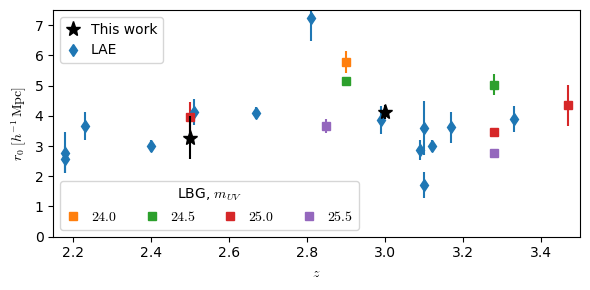

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

with open('plot_inputs/Fig6.json','r') as f:
    fig_inputs = json.load(f)

# just reload the datasets
W24lst = fig_inputs['lae']['W+24']
K19lst = fig_inputs['lae']['K+19']
H19lst = fig_inputs['lae']['H+19']
H18lst = fig_inputs['lae']['H+18']
K18lst = fig_inputs['lae']['K+18']
B16lst = fig_inputs['lae']['B+16']
O10lst = fig_inputs['lae']['O+10']
G07lst = fig_inputs['lae']['G+07']
K07lst = fig_inputs['lae']['K+07']

H09lst = fig_inputs['lbg']['H+09']
B13lst = fig_inputs['lbg']['B+13']
B11lst = fig_inputs['lbg']['B+11']
D15lst = fig_inputs['lbg']['D+15']

E25lst = fig_inputs['E25']
E25wlst = fig_inputs['E25wide']

def plot_r0(show_yerr=True):
    def draw(ax, z, r0, dr0, *, marker, colour, ms=6, label=None,zorder=2,mfc=-1):
        yerr = dr0 if show_yerr else None
        ax.errorbar(z, r0, yerr=yerr,
                    fmt=marker, markersize=ms,
                    color=colour, mfc=colour if mfc==-1 else None, linestyle='none',
                    label=label,zorder=zorder)

    lae_sets = [
        (W24lst, 'W+24'), (K19lst, 'K+19'),
        (H19lst, 'H+19'), (H18lst, 'H+18'), (K18lst, 'K+18'),
        (B16lst, 'B+16'), (O10lst, 'O+10'),
        (G07lst, 'G+07'), (K07lst, 'K+07')
    ]

    lbg_sets = [H09lst, B13lst, B11lst, D15lst]     # point-by-point
    e25_set  = E25lst                               # point-by-point, star
    e25w_set  = E25wlst                               # point-by-point, star

    # colour scheme for LBG magnitude limits  (ordered!)
    mag_order     = [24.0, 24.5, 25.0, 25.5]#, 26.0, 26.5]
    colour_by_mag = {24.0: 'C1', 24.5: 'C2', 25.0: 'C3',
                     25.5: 'C4', 26.0: 'C5', 26.5: 'C6'}

    fig, ax = plt.subplots(figsize=(6,3))

    # -------- E25 -------------------------------------------------------
    first_e25 = True
    draw(ax,[],[],None,
            marker='*', colour='k', ms=11,
            label='This work' if first_e25 else None, zorder=10)
    first_e25 = False
    for d in e25_set:
        draw(ax, d['z'], d['r0'], d['dr0'],
             marker='*', colour='k', ms=11,
             label='This work' if first_e25 else None, zorder=10)
        first_e25 = False
        
    
    # -------- LAEs ------------------------------------------------------
    first_lae = True
    draw(ax, [],[],None,
            marker='d', colour='C0',
            label='LAE' if first_lae else None)
    first_lae = False
    for data, _ in lae_sets:
        z   = [d['z']   for d in data]
        r0  = [d['r0']  for d in data]
        dr0 = [d['dr0'] for d in data]
        draw(ax, z, r0, dr0,
             marker='d', colour='C0',
             label='LAE' if first_lae else None)
        first_lae = False


    # -------- LBGs (plotted, but labels handled via proxy symbols) ------
    for lst in lbg_sets:
        for d in lst:
            ml = round(d['maglim'], 1)
            draw(ax, d['z'], d['r0'], d['dr0'],
                 marker='s', colour=colour_by_mag.get(ml, 'k'))

    handles, labels = ax.get_legend_handles_labels()
    handles_lae = []; labels_lae = []
    for h, l in zip(handles, labels):
        if l in ('LAE', 'This work'):
            handles_lae.append(h)
            labels_lae.append(l)

    # upper-left legend  (LAE & E25)
    legend_lae = ax.legend(handles_lae, labels_lae,
                           loc='upper left', frameon=True,handlelength=1)

    handles_lbg = [
        Line2D([], [], marker='s', linestyle='none',
               color=colour_by_mag[ml], markerfacecolor=colour_by_mag[ml])
        for ml in mag_order
    ]
    labels_lbg = [rf'${ml}$' for ml in mag_order]

    legend_lbg = ax.legend(handles_lbg, labels_lbg, title='LBG, $m_{UV}$',
                           loc='lower left', frameon=True,ncol=4,handlelength=1)

    ax.add_artist(legend_lae)

    ax.set_xlim(2.15, 3.5)
    ax.set_ylim(0.0, 7.5)
    ax.set_xlabel(r'$z$')
    ax.set_ylabel(r'$r_0\;[h^{-1}\,\mathrm{Mpc}]$')

    fig.tight_layout()
    # fig.savefig('plots/r0_summary.pdf')
    fig.show()
plot_r0(show_yerr=True)

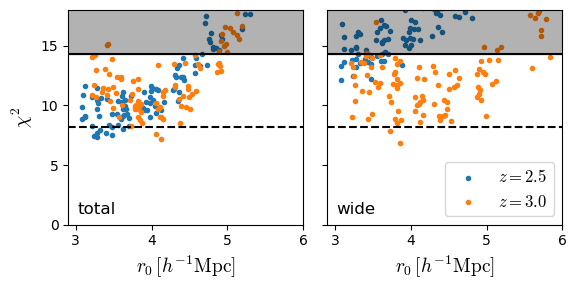

In [22]:
fig,axs = plt.subplots(1,2,figsize=(6,3))
for i in range(2):
    # also plot_inputs/Fig7_panel1.json
    if i==0: fn = '../mc/ibis_tertiary44_v4.2/r0_arr.json'
    # also plot_inputs/Fig7_panel2.json
    else: fn = '../mc/ibis_tertiary44_bright_v4.2/r0_arr.json'
    dd = json.load(open(fn,'r'))
    ax = axs[i]
    ax.scatter(dd['z1']['r0'],dd['z1']['chi2'],marker='.')
    ax.scatter(dd['z2']['r0'],dd['z2']['chi2'],marker='.')
    ax.set_xlabel(r'$r_0\,[h^{-1}\text{Mpc}]$',fontsize=14)

    if i==0: ax.set_xlim(2.9,6)
    else: ax.set_xlim(2.9,6)
    ax.set_ylim(0,18)
    # ax.grid(alpha=.8,ls='--')

    ax.axhline(8.18,c='k',ls='--')
    ax.axhline(14.34,c='k',ls='-')
    ax.fill_between(np.linspace(2,7),14.34, 30,color='k',alpha=.3)

    if i==0:
        ax.set_ylabel(r'$\chi^2$',fontsize=14)
        ax.set_title(r'total',y=.01,x=.12)
    else:
        ax.set_yticklabels([])
        ax.scatter([],[],c='C0',label=r'$z=2.5$',marker='.')
        ax.scatter([],[],c='C1',label=r'$z=3.0$',marker='.')
        ax.legend(loc='lower right',fontsize=12)
        ax.set_title(r'wide',y=.01,x=.12)


fig.tight_layout()
# fig.savefig('plots/r0_chi2.pdf')
fig.show()

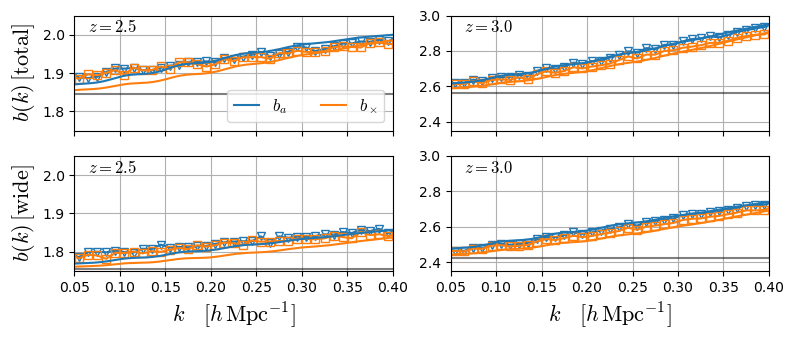

In [23]:
# remake plot from json file
fig_inputs = json.load(open('plot_inputs/Fig8.json','r'))
fig,axs = plt.subplots(2,2,figsize=(8,3.5))
z_list = fig_inputs['z_list']
line_styles = fig_inputs['line_styles']
sample_names = fig_inputs['sample_names']

for j in range(2):
    zmid = z_list[j]
    kv = np.array(fig_inputs['sim']['z%.1f'%zmid]['Pmm']['k'])
    for i in range(2):
        samp_name = sample_names[i]
        kk = np.array(fig_inputs['sim']['z%.1f'%zmid][samp_name]['k'])
        b_a = np.array(fig_inputs['sim']['z%.1f'%zmid][samp_name]['b_a'])
        axs[i,j].plot(kk, b_a,'C%dv'%(0),mfc='None',ls=line_styles[i])
    
        kk = np.array(fig_inputs['sim']['z%.1f'%zmid][samp_name]['k'])
        b_x = np.array(fig_inputs['sim']['z%.1f'%zmid][samp_name]['b_x'])
        axs[i,j].plot(kk, b_x,'C%ds'%(1),mfc='None',ls=line_styles[i])
        axs[i,j].set_title(r'$z=%.1f$'%zmid)
for j in range(2):
    zmid = z_list[j]
    kv = np.array(fig_inputs['theory']['z%.1f'%zmid]['Pmm']['k'])
    for i in range(2):
        samp_name = sample_names[i]
        kk = np.array(fig_inputs['theory']['z%.1f'%zmid][samp_name]['k'])
        b_a = np.array(fig_inputs['theory']['z%.1f'%zmid][samp_name]['b_a'])
        axs[i,j].plot(kk, b_a,'C%d'%(0)+line_styles[i],)
    
        kk = np.array(fig_inputs['theory']['z%.1f'%zmid][samp_name]['k'])
        b_x = np.array(fig_inputs['theory']['z%.1f'%zmid][samp_name]['b_x'])
        axs[i,j].plot(kk, b_x,'C%d'%(1)+line_styles[i],)
        axs[i,j].axhline(fig_inputs['theory']['z%.1f'%zmid][samp_name]['b1']+1,c='k',ls=line_styles[i],alpha=.5)
        axs[i,j].set_xlim(5e-2,.4)
axs[0,0].plot([],[],'C0',label=r'$b_a$')
axs[0,0].plot([],[],'C1',label=r'$b_\times$')
axs[0,0].legend(fontsize=12,ncol=2,handlelength=1.5,loc='lower right')

axs[0,0].set_ylim(1.75,2.05)
axs[0,1].set_ylim(2.35,3.0)
axs[1,0].set_ylim(1.75,2.05)
axs[1,1].set_ylim(2.35,3.0)

for j in range(2):
    for i in range(2):
        ax = axs[i,j]
        if j==0:
            if i==0: ax.set_ylabel(r'$b(k)\,[\text{total}]$',fontsize=16)
            else: ax.set_ylabel(r'$b(k)\,[\text{wide}]$',fontsize=16)
        if i==1:
            ax.set_xlabel(r'$k\quad [h\,{\rm Mpc}^{-1}]$',fontsize=16)
        else: 
            ax.set_xticklabels([])
        ax.set_xlim(5e-2,.4)
        # ax.set_xscale('log')
        # ax.set_yscale('log')
        ax.set_title(r'$z=%.1f$'%z_list[j],y=.78,x=.12)
        ax.grid()
fig.tight_layout()
# fig.savefig('plots/scale_dependent_bias.pdf')
fig.show()

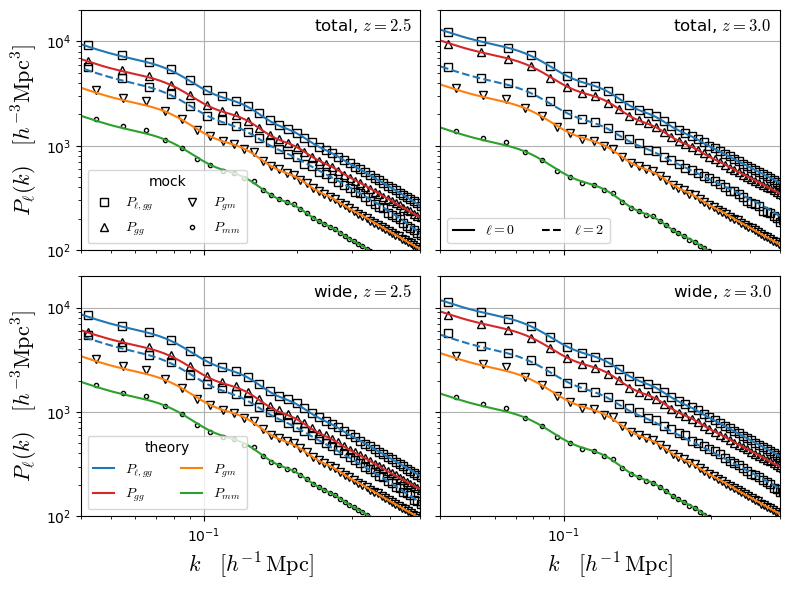

In [24]:
# now reconstruct the plot from json file

fig_inputs = json.load(open('plot_inputs/Fig9.json','r'))
spectra = ['gg_rsd','gg_real','gm','mm']

fig,axs = plt.subplots(2,2,figsize=(8,6))
z_list = fig_inputs['zmids']
for j in range(2): # redshift
    zmid = z_list[j]
    
    for i in range(2):    # sample
        if i==0: samp_name = 'total'
        else: samp_name = 'bright'

        samp_key = samp_name + '_z%.1f'%zmid
        ax = axs[i,j]

        for spec in spectra:
            sim = fig_inputs[samp_key]['sim'][spec]
            theo = fig_inputs[samp_key]['theory'][spec]
            if spec=='gg_rsd':
                ax.plot(sim['k'], sim['pk0'],'s',color='k',mfc='None')
                ax.plot(sim['k'], sim['pk2'],'s',color='k',mfc='None')
                ax.plot(theo['k'], theo['pk0'],'C0-')
                ax.plot(theo['k'], theo['pk2'],'C0--')
            elif spec=='gg_real':
                ax.plot(sim['k'], sim['pk0'],'^',color='k',mfc='None')
                ax.plot(theo['k'], theo['pk0'],'C3-')
            elif spec=='gm':
                ax.plot(sim['k'], sim['pk0'],'v',color='k',mfc='None')
                ax.plot(theo['k'], theo['pk0'],'C1-')
            elif spec=='mm':
                ax.plot(sim['k'], sim['pk0'],'.',color='k',mfc='None')
                ax.plot(theo['k'], theo['pk0'],'C2-')
            
        
        ax.set_xlim(4e-2,.5)
        ax.set_ylim(1e2,2e4)
        ax.set_xscale('log')
        ax.set_yscale('log')
        if j==0:
            ax.set_ylabel(r'$P_\ell(k)\quad [h^{-3}{\rm Mpc}^3]$',fontsize=16)
            # ax.set_ylabel(r'$P(k)\quad [h^{-2}{\rm Mpc}^2]$',fontsize=16)
            if i==0:
                ax.plot([],[],'ks',label = r'$P_{\ell,gg}$',mfc='none')
                ax.plot([],[],'k^',label = r'$P_{gg}$',mfc='none')
                ax.plot([],[],'kv',label = r'$P_{gm}$',mfc='none')
                ax.plot([],[],'k.',label = r'$P_{mm}$',mfc='none')
                ax.legend(handlelength=1.5,loc='lower left',title='mock',ncol=2)
            else:
                ax.plot([],[],'C0',label = r'$P_{\ell,gg}$')
                ax.plot([],[],'C3',label = r'$P_{gg}$')
                ax.plot([],[],'C1',label = r'$P_{gm}$')
                ax.plot([],[],'C2',label = r'$P_{mm}$')
                ax.legend(ncol=2,handlelength=1.5,loc='lower left',title='theory',)
        else: 
            if i==1: print()
            else: 
                ax.plot([],[],'k-',label = r'$\ell=0$')
                ax.plot([],[],'k--',label = r'$\ell=2$')
                ax.legend(ncol=2,handlelength=1.5,loc='lower left')
            ax.set_yticklabels([])

        if samp_name=='total':ax.set_title(r'%s, $z=%.1f$'%(samp_name,zmid),y=.88,x=.83)
        else: ax.set_title(r'wide, $z=%.1f$'%(zmid),y=.88,x=.83)
        if i==1:  ax.set_xlabel(r'$k\quad [h^{-1}\,{\rm Mpc}]$',fontsize=16)
        else:  ax.set_xticklabels([])
        ax.grid()
fig.tight_layout()
# plt.savefig('plots/zcv_fit_from_json.pdf')
fig.show()

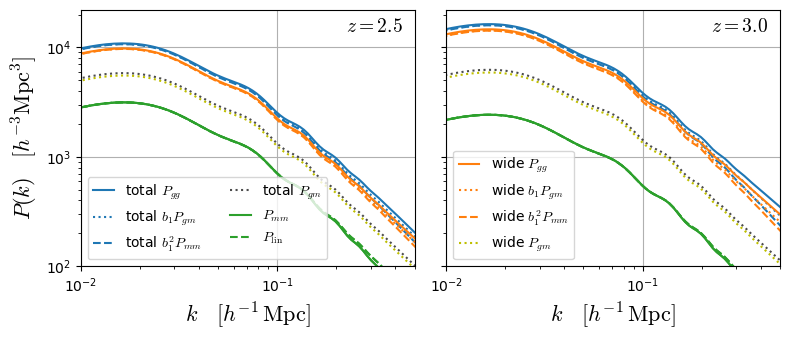

In [25]:
# remake plot from json file
fig_inputs = json.load(open('plot_inputs/Fig10.json','r'))
fig,axs = plt.subplots(1,2,figsize=(8,3.5))
z_list = fig_inputs['z_list']
for j in range(2): # redshift
    zmid = z_list[j]
    ax = axs[j]
    for i in range(2):    # sample
        if i==0: samp_name = 'total'
        else: samp_name = 'bright'
        samp_key = '%s_z%.1f'%(samp_name,zmid)
        kv = np.array(fig_inputs[samp_key]['Pgg']['k'])
        p0 = np.array(fig_inputs[samp_key]['Pgg']['P'])
        ax.plot(kv, p0,'C%d-'%i)
        kv = np.array(fig_inputs[samp_key]['Pmm']['k'])
        p0 = np.array(fig_inputs[samp_key]['Pmm']['P'])
        ax.plot(kv, p0,'C2--')
        kv = np.array(fig_inputs[samp_key]['Plin']['k'])
        p0 = np.array(fig_inputs[samp_key]['Plin']['P'])
        ax.plot(kv, p0,'C2-')
        kv = np.array(fig_inputs[samp_key]['Pgm']['k'])
        p0 = np.array(fig_inputs[samp_key]['Pgm']['P'])
        if i==0:ax.plot(kv, p0,'k:',alpha=.7)
        else: ax.plot(kv, p0,'y:',)
        kv = np.array(fig_inputs[samp_key]['bPgm']['k'])
        p0 = np.array(fig_inputs[samp_key]['bPgm']['P'])
        ax.plot(kv, p0,'C%d:'%i)
        kv = np.array(fig_inputs[samp_key]['b^2Pmm']['k'])
        p0 = np.array(fig_inputs[samp_key]['b^2Pmm']['P'])
        ax.plot(kv, p0,'C%d--'%i)

    ax.set_xlim(1e-2,.5)
    ax.set_ylim(1e2,2.2e4)
    ax.set_xscale('log')
    ax.set_yscale('log')
    if j==0:
        ax.set_ylabel(r'$P_\ell(k)\quad [h^{-3}{\rm Mpc}^3]$',fontsize=16)
        ax.set_ylabel(r'$P(k)\quad [h^{-3}{\rm Mpc}^3]$',fontsize=16)
        ax.plot([],[],'C0-',label = r'total $P_{gg}$')
        ax.plot([],[],'C0:',label = r'total $b_1 P_{gm}$')
        ax.plot([],[],'C0--',label = r'total $b_1^2 P_{mm}$')
        ax.plot([],[],'k:',label = r'total $P_{gm}$',alpha=.7)
        ax.plot([],[],'C2-',label = r'$P_{mm}$')
        ax.plot([],[],'C2--',label = r'$P_{\rm lin}$')
        ax.legend(ncol=2,handlelength=1.5,loc='lower left')
    else: 
        ax.set_yticklabels([])
        ax.plot([],[],'C1-',label = r'wide $P_{gg}$')
        ax.plot([],[],'C1:',label = r'wide $b_1 P_{gm}$')
        ax.plot([],[],'C1--',label = r'wide $b_1^2 P_{mm}$')
        ax.plot([],[],'y:',label = r'wide $P_{gm}$',)
        ax.legend(handlelength=1.5,loc='lower left')
    ax.set_title(r'$z=%.1f$'%(zmid),y=.88,x=.88,fontsize=14)
    ax.set_xlabel(r'$k\quad [h^{-1}\,{\rm Mpc}]$',fontsize=16)
    ax.grid()
fig.tight_layout()
# fig.savefig('plots/Pgg_fromjson.pdf')
fig.show()

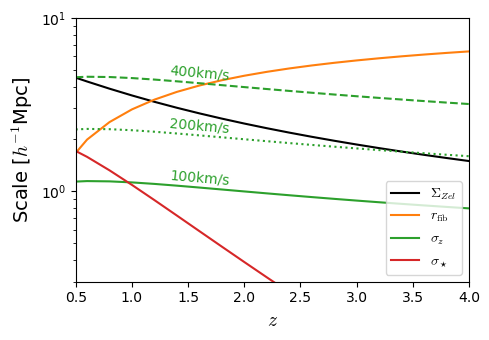

In [26]:
dd = json.load(open('plot_inputs/Fig12_panel1.json','r'))
fig,ax = plt.subplots(1,1,figsize=(5,3.5))
#
ax.plot(dd['zlist'],dd['Sig_Zel'], '-',color='k' ,label=r'$\Sigma_{Zel}$')
ax.plot(dd['zlist'],dd['chi05']  , '-',color='C1',label=r'$r_{\rm fib}$')
for fac,ls in zip([1.,2.,4.],['-',':','--']):
    sigz = [fac*sz for sz in dd['sig_z']]
    ax.plot(dd['zlist'],sigz,ls,color='C2',\
            label=r'$\sigma_z$' if ls=='-' else '')
    ax.text(dd['zlist'][6],sigz[6],'{:.0f}km/s'.format(100*fac),\
            ha='center',va='bottom',color='C2',rotation=-5)
ax.plot(dd['zlist'],dd['sig_star'], '-',color='C3',label=r'$\sigma_\star$')
#
ax.legend()
#
ax.set_ylim(0.3,10.)
ax.set_xlim(0.5,4)
ax.set_yscale('log')
ax.set_xlabel(r'$z$',fontsize=14)
ax.set_ylabel(r'Scale [$h^{-1}$Mpc]',fontsize=14)
#
plt.tight_layout()
plt.show()

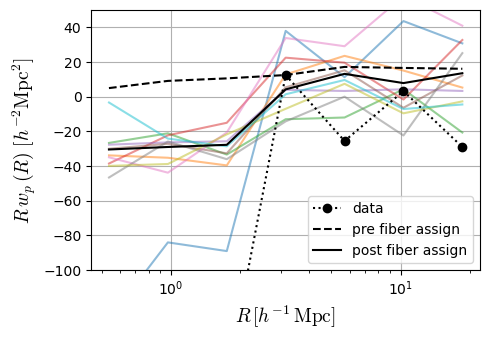

In [27]:
# remake plot from json file
fig_inputs = json.load(open('plot_inputs/Fig12_panel2.json','r'))
fig,axs = plt.subplots(1,1,figsize=(5,3.5))
ax = axs
samp_keys = ['pre_fiber_assign','post_fiber_assign']
for i,samp_key in enumerate(samp_keys):
    rr = np.array(fig_inputs[samp_key]['rr'])
    wp = np.array(fig_inputs[samp_key]['wp'])
    wperr = np.array(fig_inputs[samp_key]['wperr'])
    if i==0:
        ax.errorbar(rr, rr*wp,fmt='k--',label=samp_key.replace('_',' '))
    else:
        ax.errorbar(rr, rr*wp,fmt='k',label=samp_key.replace('_',' '))
for i,real in enumerate(fig_inputs['post_fiber_assign_realizations']):
    rr = np.array(real['rr'])
    wp = np.array(real['wp'])
    ax.plot(rr, rr*wp,alpha=.5)
datrr = np.array(fig_inputs['data']['rr'])
datwp = np.array(fig_inputs['data']['wp'])
ax.plot(datrr,datrr*datwp,'ko:',label='data')
ax.set_xscale('log')
ax.set_xlabel(r'$R\,[h^{-1}\,\text{Mpc}]$',fontsize=14)
ax.set_ylabel(r'$R\,w_p\,(R)\,\,[h^{-2}\text{Mpc}^2]$',fontsize=14)
ax.set_ylim(-100,50)
ax.grid()
ax.legend()
fig.tight_layout()
# fig.savefig('plots/wp_from_json.pdf')
fig.show()

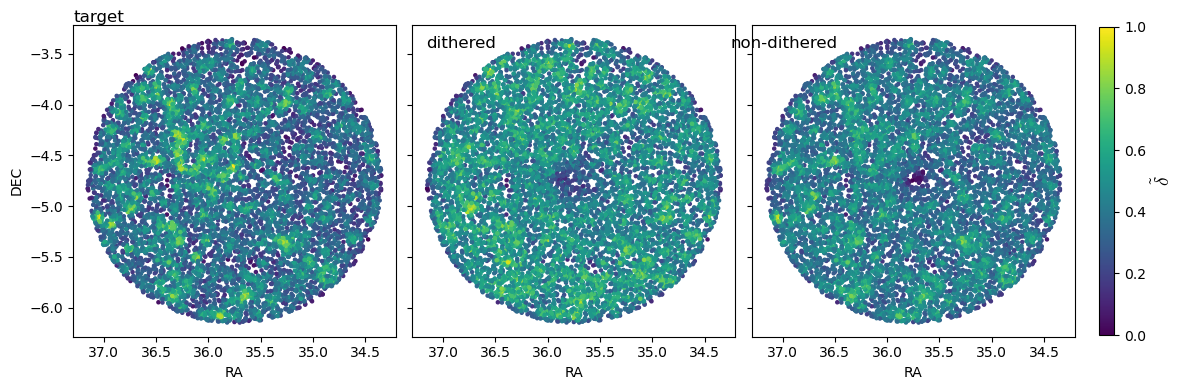

In [28]:
# remake plot from json file
fig_inputs = json.load(open('plot_inputs/Fig13.json','r'))
fig, axs = plt.subplots(1,3,figsize=(13,4))
ax = axs[0]
vmin, vmax = 0, np.max(fig_inputs['targ_targ']['COUNT'])
ax.scatter(fig_inputs['targ_targ']['RA'],fig_inputs['targ_targ']['DEC'],c=np.array(fig_inputs['targ_targ']['COUNT'])/vmax,s=5)
# ax.set_title(r'$\tilde{\delta}$(target)')
ax.set_title(r'target',loc='left',fontsize=12, pad=-10)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.invert_xaxis()       
ax = axs[1]
vmin, vmax = 0, np.max(fig_inputs['d_targ']['COUNT'])
ax.scatter(fig_inputs['d_targ']['RA'],fig_inputs['d_targ']['DEC'],c=np.array(fig_inputs['d_targ']['COUNT'])/vmax,s=5)   
# ax.set_title(r'$\tilde{\delta}$(dithered)')
ax.set_title(r'dithered',y=.9,x=.15,fontsize=12)
ax.set_xlabel('RA')
# ax.set_ylabel('DEC')
ax.set_yticklabels([])
ax.invert_xaxis()       
ax = axs[2]
vmin, vmax = 0, np.max(fig_inputs['nd_targ']['COUNT'])
sc2 = ax.scatter(fig_inputs['nd_targ']['RA'],fig_inputs['nd_targ']['DEC'],c=np.array(fig_inputs['nd_targ']['COUNT'])/vmax,s=5)   
# ax.set_title(r'$\tilde{\delta}$(non-dithered)')
ax.set_title('non-dithered',y=.9,x=.1,fontsize=12)
ax.set_xlabel('RA')
# ax.set_ylabel('DEC')
ax.set_yticklabels([])
ax.invert_xaxis()       
plt.tight_layout()
cbar = fig.colorbar(sc2, ax=axs.ravel().tolist(),   # attach to all sub-axes
                    shrink=0.99, pad=0.02)
cbar.set_label(r'$\tilde{\delta}$',fontsize=14)
# plt.savefig('plots/fiber_density.png', bbox_inches='tight')
plt.show()

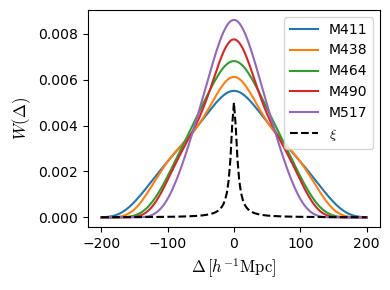

In [29]:
# remake plot from json file
fig_inputs = json.load(open('plot_inputs/Fig14_panel1.json','r'))
fig, ax = plt.subplots(1,1,figsize=(4,3))
Delta_vec = np.array(fig_inputs['Delta'])
for j,band in enumerate(fig_inputs['bands']):
    ret_vec = np.array(fig_inputs[band])
    ax.plot(Delta_vec,ret_vec,label=band)
Rxi = 5
ax.plot(Delta_vec,fig_inputs['xi'],'k--',label=r'$\xi$')
ax.set_xlabel(r'$\Delta\,[h^{-1}\text{Mpc}]$',fontsize=12)
ax.set_ylabel(r'$W(\Delta)$',fontsize=12)
ax.legend()
fig.tight_layout()
fig.show()

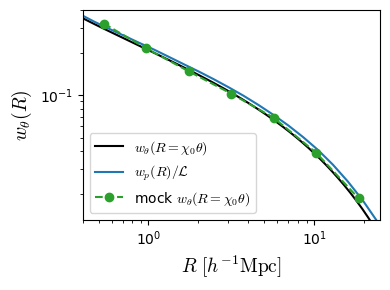

In [30]:
# remake plot from json file
fig_inputs = json.load(open('plot_inputs/Fig14_panel2.json','r'))
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(fig_inputs['theory']['R'],fig_inputs['theory']['wt'],'k',label=r'$w_\theta(R=\chi_0 \theta)$')
ax.plot(fig_inputs['approx']['R'],fig_inputs['approx']['wt'],'C0',label=r'$w_p(R)/\mathcal{L}$')
ax.plot(fig_inputs['mock']['R'],fig_inputs['mock']['wt'],'C2o--',label=r'mock $w_\theta(R=\chi_0 \theta)$')
ax.set_xlim(.4,25)
ax.set_ylim(1.3e-2,4e-1)
ax.set_ylabel(r'$w_\theta(R)$',fontsize=14)
ax.set_xlabel(r'$R\,\,[h^{-1}\text{Mpc}]$',fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
fig.tight_layout()
# fig.savefig('plots/wp_estimate.pdf')
fig.show()

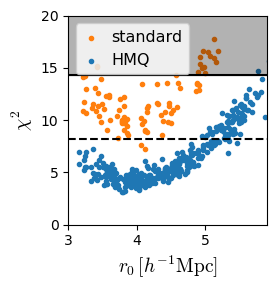

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(3,3))
ax = axs
for i in range(2):
    # also Fig15_panel1_HMQ.json
    if i==0: fn = '../mc/ibis_tertiary44_v4.2/r0_arr_ELG.json'
    # also Fig15_panel1_standard.json
    else: fn = '../mc/ibis_tertiary44_v4.2/r0_arr.json'
    dd = json.load(open(fn,'r'))
    # ax = axs[0]
    ax.scatter(dd['z2']['r0'],dd['z2']['chi2'],marker='.')
    # ax.scatter(dd['z2']['r0'],dd['z2']['chi2'],marker='.')
    ax.set_xlabel(r'$r_0\,[h^{-1}\text{Mpc}]$',fontsize=14)

ax.set_xlim(3.,5.9)
ax.set_ylim(0,20)
# ax.grid(alpha=.8,ls='--')

ax.axhline(8.18,c='k',ls='--')
ax.axhline(14.34,c='k',ls='-')
ax.fill_between(np.linspace(2,7),14.34, 30,color='k',alpha=.3)

ax.set_ylabel(r'$\chi^2$',fontsize=14)
ax.scatter([],[],c='C1',label=r'standard',marker='.')
ax.scatter([],[],c='C0',label=r'HMQ',marker='.')
ax.legend(loc='upper left',fontsize=11.5,handlelength=1)

fig.tight_layout()
# fig.savefig('plots/r0_chi2_ELG.pdf')
fig.show()

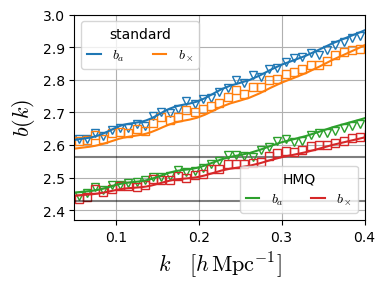

In [ ]:
# remake plot from json file
fig_inputs = json.load(open('plot_inputs/Fig15_panel2.json','r'))
fig,ax = plt.subplots(1,1,figsize=(4,3))
line_styles = ['-','-']
labels = ['standard','HMQ']
for i in range(2):
    label = labels[i]
    # sim
    kk = np.array(fig_inputs[label]['sim']['k'])
    ba = np.array(fig_inputs[label]['sim']['ba'])
    bx = np.array(fig_inputs[label]['sim']['bx'])
    ax.plot(kk, ba,'C%dv'%(2*i),mfc='None')
    ax.plot(kk, bx,'C%d s'%(2*i+1),mfc='None')
    # theory
    kk = np.array(fig_inputs[label]['theory']['k'])
    ba = np.array(fig_inputs[label]['theory']['ba'])
    bx = np.array(fig_inputs[label]['theory']['bx'])
    b1 = fig_inputs[label]['theory']['b1']
    ax.plot(kk, ba,'C%d'%(2*i)+line_styles[i],)
    ax.plot(kk, bx,'C%d'%(2*i+1)+line_styles[i],)
    ax.axhline(b1+1,c='k',ls=line_styles[i],alpha=.5)
l0, = ax.plot([],[],'C0',label=r'$b_a$')
l1, = ax.plot([],[],'C1',label=r'$b_\times$')
l2, = ax.plot([],[],'C2',label=r'$b_a$')
l3, = ax.plot([],[],'C3',label=r'$b_\times$')
legend1 = ax.legend(handles=[l0,l1], loc='upper left',frameon=True,handlelength=1,ncol=2,title='standard')
# legend1.get_texts()[1].set_fontweight('bold')
ax.add_artist(legend1)  
# Second legend (for dashed lines)
legend2 = ax.legend(handles=[l2,l3], loc='lower right',frameon=True,handlelength=1,ncol=2,title='HMQ')
ax.set_ylabel(r'$b(k)$',fontsize=16)
ax.set_xlabel(r'$k\quad [h\,{\rm Mpc}^{-1}]$',fontsize=16)
ax.set_xlim(5e-2,.4)
ax.set_ylim(2.37,3.0)
ax.grid()
fig.tight_layout()
# fig.savefig('plots/scale_dependent_bias_ELG_total_from_json.png',dpi=300)
fig.show()


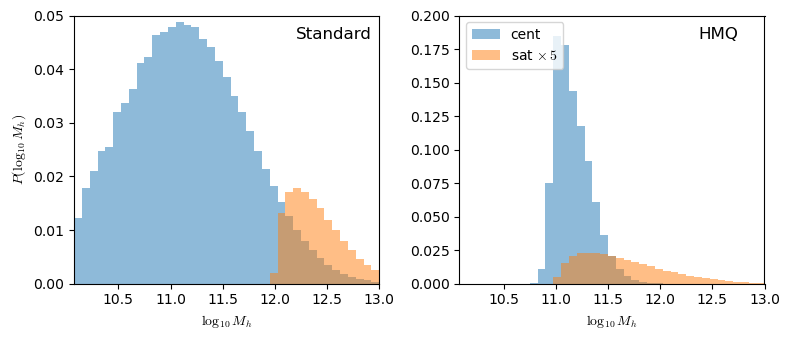

In [34]:
# plot figure from json file
fig_inputs = json.load(open('plot_inputs/Fig16.json','r'))
fig, axs = plt.subplots(1,2,figsize=(8,3.5))

for i,gal in enumerate(fig_inputs['fns'].keys()):
    axs[i].hist(fig_inputs[gal+'_cent_edges'][:-1],alpha=.5,color='C0',bins=fig_inputs[gal+'_cent_edges'],
                weights=np.array(fig_inputs[gal+'_cent_hist']) * 1/ fig_inputs[gal+'_Nobj'])
    axs[i].hist(fig_inputs[gal+'_sat_edges'][:-1],alpha=.5,color='C1',bins=fig_inputs[gal+'_sat_edges'],
                weights=np.array(fig_inputs[gal+'_sat_hist']) * 1 /fig_inputs[gal+'_Nobj'] * 5 )
    axs[i].set_xlabel(r'$\log_{10} M_h$')
    label = 'Standard' if gal=='LRG' else 'HMQ'
    axs[i].set_title(label,y=.88,x=.85)
    axs[i].set_xlim(10.075,13)
axs[0].set_ylim(0,0.05)
axs[1].set_ylim(0,0.20)
axs[1].hist([],alpha=.5,color='C0',label='cent',bins=bins)
axs[1].hist([],alpha=.5,color='C1',label=r'sat$\,\times 5$',bins=bins)
axs[1].legend(loc='upper left')
axs[0].set_ylabel(r'$P(\log_{10} M_h)$')
fig.tight_layout()
# fig.savefig('gal_Mh.pdf')